<a href="https://colab.research.google.com/github/Sashimimeow/-SC_Data_Visualization/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Project2_66_PTJL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 : Analyzing data from MovieLens

**Due Date: Sunday, October 11**

**NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!**


## The MovieLens data sets

<img src="https://www.oreilly.com/api/v2/epubs/9781788993753/files/assets/dc0f89d7-6e9c-4790-a6c0-06725f2dbe8a.png">

https://movielens.org

In [1]:
from IPython.lib.display import YouTubeVideo

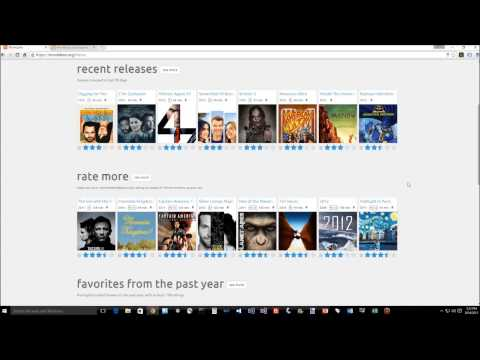

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

1. นางสาวทิพย์วัลย์ สุโพธิ์     643020062-6 thippawan.s@kkumail.com
2. นางสาวพิมชนก วงศ์สายเชื้อ 643020510-5 pimchanok.w@kkumail.com
3. นางสาววิภาดา ห่วงสูงเนิน  643020520-2    wipada.h@kkumail.com
4. นางสาววริศรา ปันลา      643020519-7 waritsara.pa@kkumail.com

**Objectives**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how the rate movies.
    * http://grouplens.org/datasets/movielens/
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Useful Readings:**
* Chapter 14.2 (only the section on the MovieLens 1M Data Set), Chapter 5, 6.2, 7.2, 8, and 9 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (View pivately on Google Classroom).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

**NOTE**: Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

-import dataset

-ใส่ชื่อ header

-merge ได้ df -> df.to_hdf("file path/df.h5",key = 'dfKey0') #ถูกเซฟลงใน Directory ใน classroom

-movieDF = pd.read_kdf("file path/df.h5",key = 'dfKey0')

-ให้สร้างสมมติฐานว่า ผลมันเป็นจริงตามที่คิดไว้ไหม

# Problem 1:

## Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
* Store the data into an HDF5 file. See
    * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_hdf.html
    * https://pandas.pydata.org/docs/reference/api/pandas.read_hdf.html

####Read data

In [3]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
# Create a HDF5



In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
from google.colab import drive
# To mount at google drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [6]:
import pandas as pd
pd.read_table("/content/drive/MyDrive/Data warehouse/users.dat", sep="::", header=None, names=['X'+str(i) for i in range(1,6)])

<ipython-input-6-aa240b86cd65>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pd.read_table("/content/drive/MyDrive/Data warehouse/users.dat", sep="::", header=None, names=['X'+str(i) for i in range(1,6)])


,X1,X2,X3,X4,X5
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [7]:
# Read table files into DataFrames
import pandas as pd
users_df = pd.read_table("/content/drive/MyDrive/Data warehouse/users.dat", sep='::', engine='python', header=None,
                       names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
movies_df = pd.read_table("/content/drive/MyDrive/Data warehouse/movies.dat", sep='::',encoding = "ISO-8859-1", header=None,
                        names= ['MovieID','Title','Genres'])
ratings_df = pd.read_table("/content/drive/MyDrive/Data warehouse/ratings.dat", sep='::', engine='python', header=None,
                         names=['UserID','MovieID','Rating','Timestamp'])


<ipython-input-7-1bc8a9f8606b>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_table("/content/drive/MyDrive/Data warehouse/movies.dat", sep='::',encoding = "ISO-8859-1", header=None,


In [8]:
# Merge DataFrames
merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
merged_df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [9]:
# Create a HDF5
ratings_df.to_hdf('data.h5', key='rating')
movies_df.to_hdf('data.h5', key='movie')
users_df.to_hdf('data.h5', key='user')


## Report some basic details of the data you collected.  For example:
(สร้างแค่ 1 ก็พอ ว่า Rating ของกลุ่มคนหลายแบบต่างกันยังไง)

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!

In [ ]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------


How many movies have an average rating over 4.5 overall?

In [10]:
# Calculate the average rating for each movie
average_ratings = merged_df.groupby('MovieID')['Rating'].mean()
highly_rated_movies = average_ratings[average_ratings > 4.5]
count_highly_rated_movies = len(highly_rated_movies)
print(f"Number of movies with an average rating over 4.5 : {count_highly_rated_movies}","Movies")

Number of movies with an average rating over 4.5 : 21 Movies


How many movies have an average rating over 4.5 among men? How about women?

In [11]:
# Calculate the average rating for each movie for men and women separately
average_ratings_gender = merged_df.pivot_table(index='MovieID', columns='Gender', values='Rating', aggfunc='mean')

count_highly_rated_movies_men = len(average_ratings_gender[average_ratings_gender['M'] > 4.5])
count_highly_rated_movies_women = len(average_ratings_gender[average_ratings_gender['F'] > 4.5])

print(f"Number of movies with an average rating over 4.5 among men: {count_highly_rated_movies_men}","Movies")
print(f"Number of movies with an average rating over 4.5 among women: {count_highly_rated_movies_women}","Movies")


Number of movies with an average rating over 4.5 among men: 23 Movies
Number of movies with an average rating over 4.5 among women: 51 Movies


How many movies have an median rating over 4.5 among men over age 30? How about women over age 30?

In [12]:
# Filter the DataFrame for users over the age of 30
filtered_df = merged_df[(merged_df['Age'] > 30)]

# Calculate the median rating for each movie for men and women over 30 separately
median_ratings_gender_age30 = filtered_df.pivot_table(index='MovieID', columns='Gender', values='Rating', aggfunc='median')

# Filter movies with a median rating over 4.5 for men and women over age 30 separately
highly_rated_movies_men_age30 = median_ratings_gender_age30[median_ratings_gender_age30['M'] > 4.5]
highly_rated_movies_women_age30 = median_ratings_gender_age30[median_ratings_gender_age30['F'] > 4.5]

# Get the count of highly rated movies for men and women over age 30 separately
count_highly_rated_movies_men_age30 = len(highly_rated_movies_men_age30)
count_highly_rated_movies_women_age30 = len(highly_rated_movies_women_age30)

print(f"Number of movies with a median rating over 4.5 among men over age 30: {count_highly_rated_movies_men_age30}","Movies")
print(f"Number of movies with a median rating over 4.5 among women over age 30: {count_highly_rated_movies_women_age30}","Movies")


Number of movies with a median rating over 4.5 among men over age 30: 86 Movies
Number of movies with a median rating over 4.5 among women over age 30: 149 Movies


What are the ten most popular movies?

In [13]:
# Calculate the number of ratings for each movie
movie_ratings_count = merged_df.groupby('MovieID')['Rating'].count()

# Merge with the movies_df to get the movie titles
top_10_popular_movies = pd.merge(movie_ratings_count.sort_values(ascending=False).reset_index(), movies_df, on='MovieID')

# Display the top 10 most popular movies
print("Top 10 Most Popular Movies:")
top_10_popular_movies.head(10)


Top 10 Most Popular Movies:


,MovieID,Rating,Title,Genres
0,2858,3428,American Beauty (1999),Comedy|Drama
1,260,2991,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
2,1196,2990,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
3,1210,2883,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
4,480,2672,Jurassic Park (1993),Action|Adventure|Sci-Fi
5,2028,2653,Saving Private Ryan (1998),Action|Drama|War
6,589,2649,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
7,2571,2590,"Matrix, The (1999)",Action|Sci-Fi|Thriller
8,1270,2583,Back to the Future (1985),Comedy|Sci-Fi
9,593,2578,"Silence of the Lambs, The (1991)",Drama|Thriller


Make some conjectures about how easy various groups are to please? Support your answers with data!

สมมติฐาน :

In [14]:
##สมมติฐาน : เพศหญิงส่วนใหญ่ชอบดูหนัง ประเภท Drama

เซลล์โค้ด <ubFP_2O430SD>
# %% [code]
# Filter the DataFrame for female viewers
female_ratings = merged_df[merged_df['Gender'] == 'F']

# Split and count the genres
genre_counts = female_ratings['Genres'].str.split('|').explode().value_counts()

# Display the genres liked the most by females
most_liked_genres = genre_counts.head(10)

print("Genres liked the most by females:")
most_liked_genres

เอาต์พุตของการเรียกใช้จากวันที่ 11 ต.ค. 2023 20:11
0KB
	Stream
		Genres liked the most by females:
	text/plain
		Drama         98153
		Comedy        96271
		Romance       50297
		Action        45650
		Thriller      40308
		Sci-Fi        27400
		Adventure     27332
		Children's    21317
		Crime         16442
		Horror        14635
		Name: Genres, dtype: int64

เซลล์โค้ด <QXaeFg9X16Vt>
# %% [code]
# Filter the DataFrame for highly rated movies (rating 4 or 5)
highly_rated_movies = merged_df[merged_df['Rating'].isin([4, 5])]

# Create a pivot table to calculate the count of ratings for Drama movies for each gender
pivot_table = highly_rated_movies.pivot_table(index='Genres', columns='Gender', values='Rating', aggfunc='count')

# Select the 'Drama' row from the pivot table
drama_ratings = pivot_table.loc['Drama']

# Determine which gender has the higher count of ratings for Drama movies
most_liked_gender = 'Female' if drama_ratings['F'] > drama_ratings['M'] else 'Male'

print(f"The gender that likes Drama movies the most among highly rated movies (4 or 5) is: {most_liked_gender}")

SyntaxError: ignored

  # Problem 2: Expand your investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.**
* Plot a histogram of the ratings of all movies. (Plot his ของ Rating ทั้งหมด)
* Plot a histogram of the *number* of ratings each movie recieved. (จำนวนครั้งที่หนังแต่ละเรื่องถูก rate)
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times. (จากข้อสองดูว่าเรื่องไหน rate มากกว่า 100 ครั้ง)
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times? (เอาเฉพาะหนังที่ถูก rate เยอะมา)
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times? (หนังเรื่องไหนมี rate สูงมากที่คิดว่าจะดี ก็เลือกมา)
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5? (ช่วงอายุต่างๆมีการให้ rating ต่างกันหรือไม่ สร้าง histogram ทดสอบสมมติฐาน)
    *  Be sure to come up with your own conjectures and support them with data!

In [15]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
import matplotlib.pyplot as plt
import numpy as np



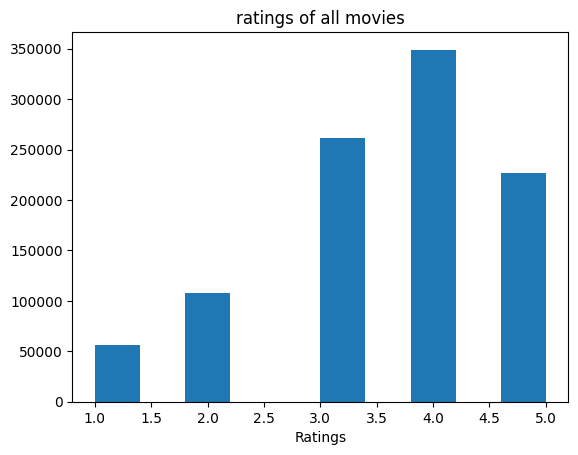

In [16]:
#Plot a histogram of the ratings of all movies. (Plot his ของ Rating ทั้งหมด)

rating_p= ratings_df[['MovieID','Rating']]
rating_p = rating_p.set_index('MovieID')

plt.hist(rating_p)
plt.title('ratings of all movies')
plt.ylabel('')
plt.xlabel('Ratings')
plt.show()

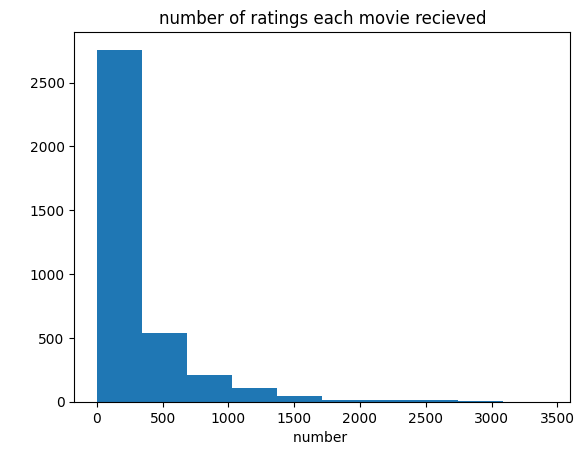

In [17]:
#Plot a histogram of the *number* of ratings each movie recieved. (จำนวนครั้งที่หนังแต่ละเรื่องถูก rate)

rating_p= ratings_df[['MovieID','Rating']]
rating_p = rating_p.groupby('MovieID').count().sort_values(by='Rating',ascending = False)

plt.hist(rating_p)
plt.title('number of ratings each movie recieved')
plt.ylabel( ' ')
plt.xlabel('number ')
plt.show()

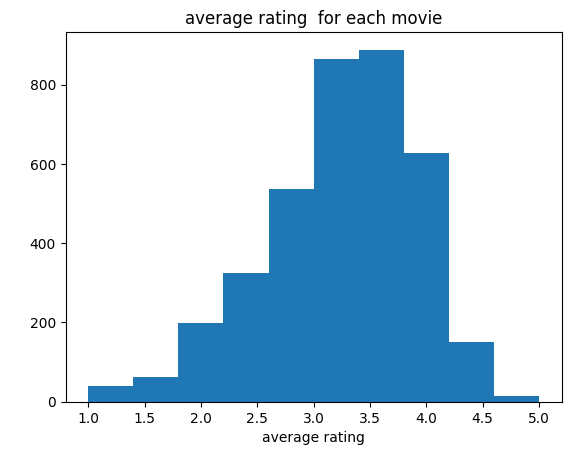

In [18]:
# Plot a histogram of the *average rating* for each movie.

rating_p= ratings_df[['MovieID','Rating']]
rating_p = rating_p.groupby('MovieID').mean()

plt.hist(rating_p)
plt.title('average rating  for each movie')
plt.ylabel( ' ')
plt.xlabel('average rating')
plt.show()

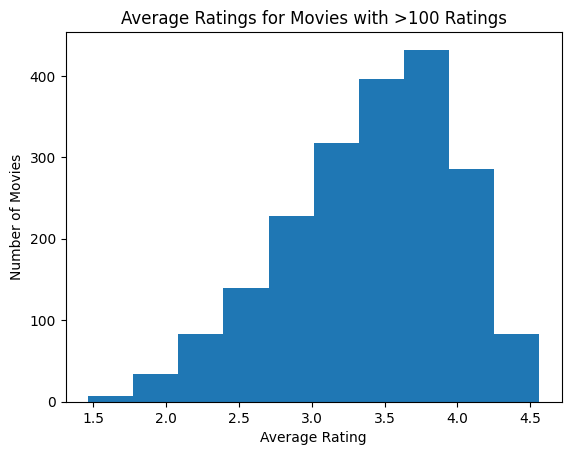

In [19]:
#Plot a histogram of the *average rating* for movies which are rated more than 100 times. (จากข้อสองดูว่าเรื่องไหน rate มากกว่า 100 ครั้ง)
    # What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times? (เอาเฉพาะหนังที่ถูก rate เยอะมา)
    # Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times? (หนังเรื่องไหนมี rate สูงมากที่คิดว่าจะดี ก็เลือกมา)


average_ratings = ratings_df.groupby('MovieID')['Rating'].mean()
ratings_count = ratings_df['MovieID'].value_counts()
merged_df = pd.DataFrame({'AverageRating': average_ratings, 'RatingsCount': ratings_count})
highly_rated_movies = merged_df[merged_df['RatingsCount'] > 100]

# Plot a histogram
plt.hist(highly_rated_movies['AverageRating'])
plt.title('Average Ratings for Movies with >100 Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

#เพศหญิงและเพศชายมีการให้ rating ที่แตกต่างกันหรือไม่

In [20]:
highly_rated_movies

,AverageRating,RatingsCount
1,4.146846,2077
2,3.201141,701
3,3.016736,478
4,2.729412,170
5,3.006757,296
...,...,...
3936,3.723214,112
3937,2.940741,135
3948,3.635731,862
3949,4.115132,304


In [21]:
users_df

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [22]:
merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
merged_df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


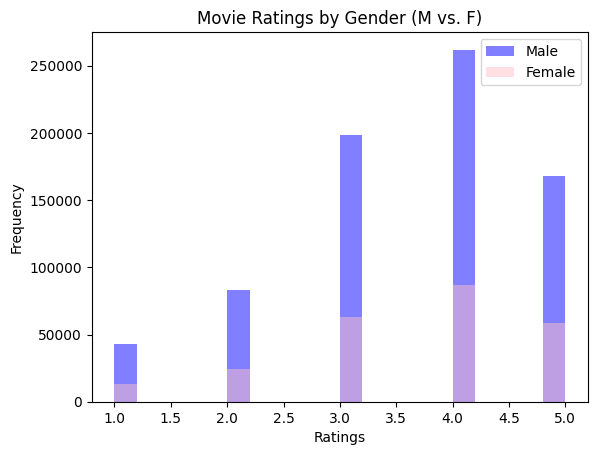

In [23]:
import pandas as pd
import matplotlib.pyplot as plt


merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
male_ratings = merged_df[merged_df['Gender'] == 'M']
female_ratings = merged_df[merged_df['Gender'] == 'F']

# Create histograms M vs F
plt.hist(male_ratings['Rating'], bins=20, alpha=0.5, color='blue', label='Male')
plt.hist(female_ratings['Rating'], bins=20, alpha=0.5, color='pink', label='Female')

plt.title('Movie Ratings by Gender (M vs. F)')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#Made code

In [24]:
# Read table files into DataFrames
import pandas as pd
users_df = pd.read_table("/content/drive/MyDrive/Data warehouse/users.dat", sep='::', engine='python', header=None,
                       names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])
movies_df = pd.read_table("/content/drive/MyDrive/Data warehouse/movies.dat", sep='::',encoding = "ISO-8859-1", header=None,
                        names= ['MovieID','Title','Genres'])
ratings_df = pd.read_table("/content/drive/MyDrive/Data warehouse/ratings.dat", sep='::', engine='python', header=None,
                         names=['UserID','MovieID','Rating','Timestamp'])


<ipython-input-24-1bc8a9f8606b>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_table("/content/drive/MyDrive/Data warehouse/movies.dat", sep='::',encoding = "ISO-8859-1", header=None,


In [ ]:
# Merge DataFrames
merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
merged_df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [25]:
# Check the column names of the DataFrame
print(users_df.columns)


Index(['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], dtype='object')



# Problem 3:
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [26]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

### A scatter plot of men versus women and their mean rating for every movie

<ipython-input-27-f7fbeaebbd85>:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Male_Mean = data_Male.groupby('Title').mean()
<ipython-input-27-f7fbeaebbd85>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Female_Mean = data_Female.groupby('Title').mean()


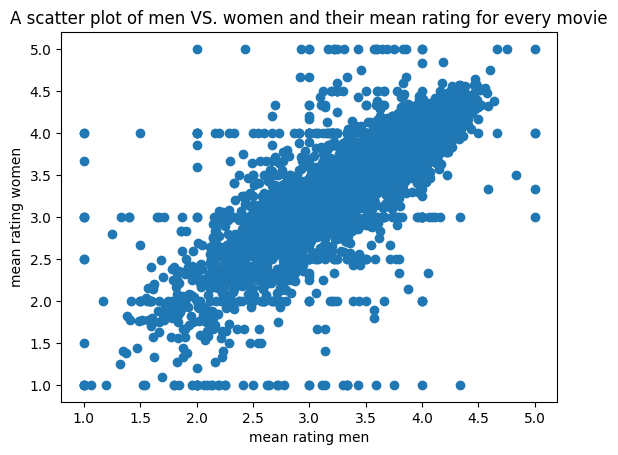

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# แสดงข้อมูลที่เลือกไว้ คือ 'Title', 'Gender', และ 'Rating'
data_M_and_F =  merged_df [['Title','Gender','Rating']]

# สร้าง DataFrame สำหรับเพศชาย
data_Male = data_M_and_F[data_M_and_F['Gender'] == 'M']

# สร้าง DataFrame สำหรับเพศหญิง
data_Female = data_M_and_F[data_M_and_F['Gender'] == 'F']

# คำนวณค่าเฉลี่ยของการให้คะแนนเฉลี่ยของผู้ชายแต่ละหนัง
data_Male_Mean = data_Male.groupby('Title').mean()

# คำนวณค่าเฉลี่ยของการให้คะแนนเฉลี่ยของผู้หญิงแต่ละหนัง
data_Female_Mean = data_Female.groupby('Title').mean()

# รวมข้อมูลเฉลี่ยของผู้ชายและผู้หญิง ด้วย 'Title' เป็นตัวรวม
data_plot = data_Male_Mean.merge(data_Female_Mean, how='left', on='Title')

# ลบแถวที่มีค่าว่างออก
data_plot_nonna = data_plot.dropna()

# สร้างแผนภูมิแบบกระจาย
plt.scatter(data_plot_nonna['Rating_x'], data_plot_nonna['Rating_y'])
plt.title('A scatter plot of men VS. women and their mean rating for every movie')
plt.xlabel('mean rating men')
plt.ylabel('mean rating women')
plt.show()


### A scatter plot of men versus women and their mean rating for movies rated more than 200 times

<ipython-input-29-892574ff2487>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Male_Mean = data_Male.groupby('Title').mean()
<ipython-input-29-892574ff2487>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Female_Mean = data_Female.groupby('Title').mean()


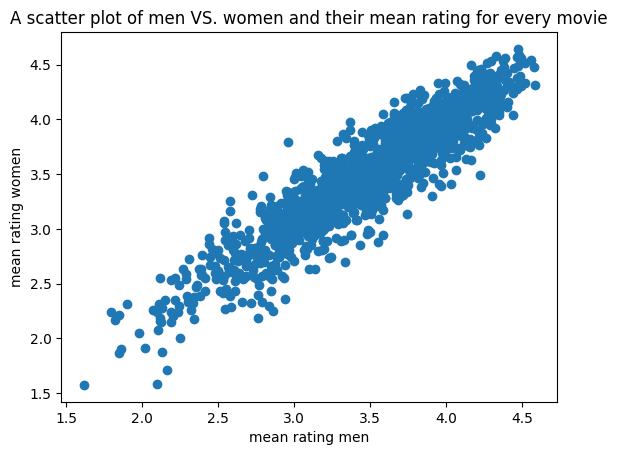

In [29]:
#-------------------------------------------------------------------------------------
data_MF =  merged_df[['Title','Gender','Rating']]
data_MF1 = data_MF[['Title','Rating']]
data_MF2 = data_MF1.groupby('Title').count().sort_values(by='Rating',ascending = False)
data_MF3 = data_MF2.reset_index()
#---------------------------------------------------------------------------------------
data_Male = data_M_and_F[data_M_and_F['Gender']=='M']
data_Female = data_M_and_F[data_M_and_F['Gender']=='F']
data_Male_Mean = data_Male.groupby('Title').mean()
data_Female_Mean = data_Female.groupby('Title').mean()
#-------------------------------------------------------------------------------------------
data_MF4 = data_MF3.merge(data_Male_Mean,how='left',on='Title')
data_MF5 = data_MF3.merge(data_Female_Mean,how='left',on='Title')
#----------------------------------------------------------------------------------------
data_MF4_1 = data_MF4[data_MF4['Rating_x'] >= 200]
use_full_M = data_MF4_1[['Title','Rating_y']]
use_full_M = use_full_M.set_index('Title')
#---------------------------------------------------------------------------------------
data_MF5_1 = data_MF5[data_MF5['Rating_x'] >= 200]
use_full_F = data_MF5_1[['Title','Rating_y']]
use_full_F = use_full_F.set_index('Title')
#--------------------------------------------------------------------------------------
plt.scatter(use_full_M, use_full_F)
plt.title('A scatter plot of men VS. women and their mean rating for every movie')
plt.xlabel('mean rating men')
plt.ylabel('mean rating women')
plt.show()


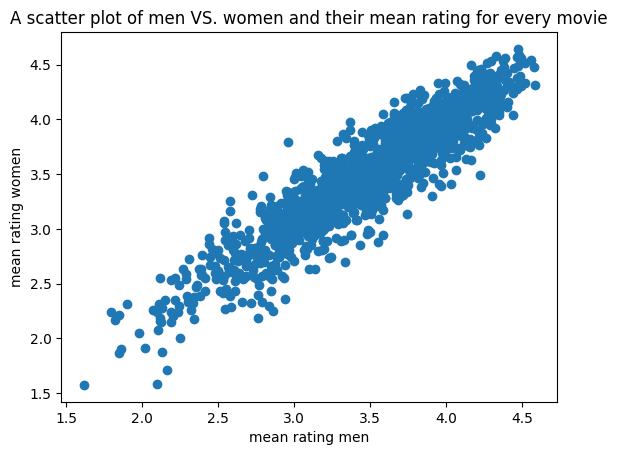

In [28]:
# ดึงข้อมูลเฉพาะ 'Title', 'Gender', และ 'Rating'
data_MF = merged_df[['Title', 'Gender', 'Rating']]

# สร้าง DataFrame เฉพาะ 'Title' และ 'Rating'
data_MF1 = data_MF[['Title', 'Rating']]

# หาจำนวนคนที่ให้คะแนนแต่ละหนัง
data_MF2 = data_MF1.groupby('Title').count().sort_values(by='Rating', ascending=False)

# รีเซ็ตดัชนีเพื่อให้ 'Title' เป็นคอลัมน์
data_MF3 = data_MF2.reset_index()

# กระโดดข้ามขั้นตอนในการคำนวณข้อมูลเฉลี่ยของผู้ชายและผู้หญิงสำหรับแต่ละหนัง
# และเปลี่ยนชื่อข้อมูลเพื่อให้เข้าใจง่าย
data_Male = data_M_and_F[data_M_and_F['Gender'] == 'M']
data_Female = data_M_and_F[data_M_and_F['Gender'] == 'F']
data_Male_Mean = data_Male.groupby('Title')['Rating'].mean().reset_index()
data_Female_Mean = data_Female.groupby('Title')['Rating'].mean().reset_index()

# รวมข้อมูลจำนวนคนที่ให้คะแนนและข้อมูลเฉลี่ยของผู้ชายและผู้หญิงแต่ละหนัง
data_MF4 = data_MF3.merge(data_Male_Mean, how='left', on='Title')
data_MF5 = data_MF3.merge(data_Female_Mean, how='left', on='Title')

# กรองข้อมูลเพื่อเลือกหนังที่มีการให้คะแนนมากกว่าหรือเท่ากับ 200 ครั้ง
data_MF4_1 = data_MF4[data_MF4['Rating_x'] >= 200]
use_full_M = data_MF4_1[['Title', 'Rating_y']]
use_full_M = use_full_M.set_index('Title')

data_MF5_1 = data_MF5[data_MF5['Rating_x'] >= 200]
use_full_F = data_MF5_1[['Title', 'Rating_y']]
use_full_F = use_full_F.set_index('Title')

# สร้าง scatter plot ด้วยข้อมูลที่คัดเลือกแล้ว
plt.scatter(use_full_M, use_full_F)
plt.title('A scatter plot of men VS. women and their mean rating for every movie')
plt.xlabel('mean rating men')
plt.ylabel('mean rating women')
plt.show()


### The correlation coefficent between the ratings of men and women

In [30]:
#-------------------------------
# The correlation mean rating for every movie
print(np.corrcoef(data_plot_nonna['Rating_x'],data_plot_nonna['Rating_y']))
#-------------------------------
# The correlation movies rated more than 200 times
print(np.corrcoef(use_full_M['Rating_y'],use_full_F['Rating_y']))


[[1.         0.76318989]
 [0.76318989 1.        ]]
[[1.         0.91896272]
 [0.91896272 1.        ]]


In [31]:
print(np.corrcoef(data_plot_nonna['Rating_x'], data_plot_nonna['Rating_y']))




[[1.         0.76318989]
 [0.76318989 1.        ]]


In [32]:
# The correlation movies rated more than 200 times
print(np.corrcoef(use_full_M['Rating_y'],use_full_F['Rating_y']))

[[1.         0.91896272]
 [0.91896272 1.        ]]


In [39]:
# Merge DataFrames
merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
merged_df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [38]:
from pandas.core._numba.executor import generate_shared_aggregator
print(generate_shared_aggregator)

## Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender

Example<br>
Conjecture 1: Men and women are more similar when they are older, consider their rating over the same genres.

Conjecture 2: Men and women more similar when they are academic/educator, artist, college/grad student, and programmer.

Conjecture 3: Men and women more similar when they watch Action, Drama, War, and Triller.

<ipython-input-51-7c942585b6be>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Male_Action = data_3_Action_TR[data_M_and_F['Gender']=='M']
<ipython-input-51-7c942585b6be>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Femal_Action = data_3_Action_TR[data_M_and_F['Gender']=='F']
<ipython-input-51-7c942585b6be>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Male_Action_Mean = data_Male_Action.groupby('Age').mean()
<ipython-input-51-7c942585b6be>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Female_Action_Mean = dat

NameError: ignored

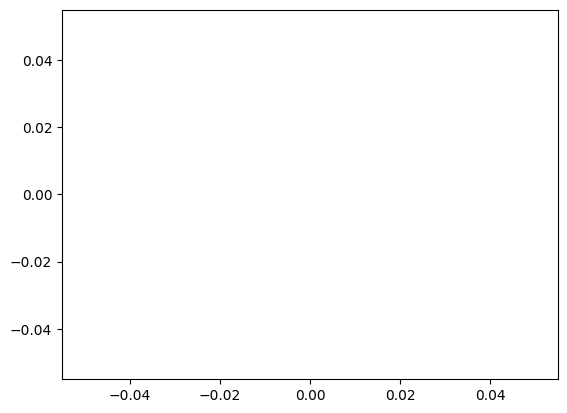

In [51]:
#-------------------------------UserID	MovieID	Rating	Timestamp	Gender	Age	Occupation	Zip-code	Title	Genres  Action
data_3_3 = merged_df[['Age','Gender','Genres','Rating']]
data_3_Action = data_3_3[data_3_3['Genres']==15]
data_3_Drama = data_3_3[data_3_3['Genres']==12]
data_3_Comedy = data_3_3[data_3_3['Genres']==6]
#-------------------------------
#Action
data_3_Action_TR = data_3_Action[['Age','Gender','Rating']]
data_Male_Action = data_3_Action_TR[data_M_and_F['Gender']=='M']
data_Femal_Action = data_3_Action_TR[data_M_and_F['Gender']=='F']
data_Male_Action_Mean = data_Male_Action.groupby('Age').mean()
data_Female_Action_Mean = data_Femal_Action.groupby('Age').mean()
data_plot_Action= data_Male_Action_Mean.merge(data_Female_Action_Mean,how='left',on='Age')
data_plot_Action_nonna = data_plot_Action.dropna()
plt.scatter(data_plot_Action_nonna['Rating_x'], data_plot_Action_nonna['Rating_y'])
#Drama
data_3_Drama_TR = data_3_Drama[['Age','Gender','Rating']]
data_Male_Drama = data_3_Drama_TR[data_M_and_F['Gender']=='M']
data_Femal_Drama = data_3_Drama_TR[data_M_and_F['Gender']=='F']
data_Male_Drama_Mean = data_Male_Drama.groupby('Age').mean()
data_Female_Drama_Mean = data_Femal_Drama.groupby('Age').mean()
data_plot_Drama = data_Male_Drama_Mean.merge(data_Female_Drama_Mean,how='left',on='Age')
data_plot_Drama_nonna = data_plot_Drama.dropna()
plt.scatter(data_plot_Drama_nonna['Rating_x'], data_plot_Drama_nonna['Rating_y'])
#Comedy
data_3_Comedy_TR = data_3_Comedy[['Age','Gender','Rating']]
data_Male_Comedy = data_3_Comedy_TR[data_M_and_F['Gender']=='M']
data_Femal_Comedy = data_3_Comedy_TR[data_M_and_F['Gender']=='F']
data_Male_Comedy_Mean = data_Male_Comedy.groupby('Age').mean()
data_Female_Comedyr_Mean = data_Femal_Comedy.groupby('Age').mean()
data_plot_Comedy = data_Male_Comedy_Mean.merge(data_Female_Comedyr_Mean,how='left',on='Age')
data_plot_Comedy_nonna = data_plot_Comedy.dropna()
plt.scatter(data_plot_Comedy_nonna['Rating_x'], data_plot_Comedy_nonna['Rating_y'])
#-------------------------------------------------------------------------------------------------------------------------
#scientist
print(np.corrcoef(data_plot_Action_nonna['Rating_x'],data_plot_Actoin_nonna['Rating_y']))
#programmer
print(np.corrcoef(data_plot_Drama_nonna['Rating_x'],data_plot_Drama_nonna['Rating_y']))
#doctor
print(np.corrcoef(data_plot_Comedy_nonna['Rating_x'],data_plot_Comedy_nonna['Rating_y']))


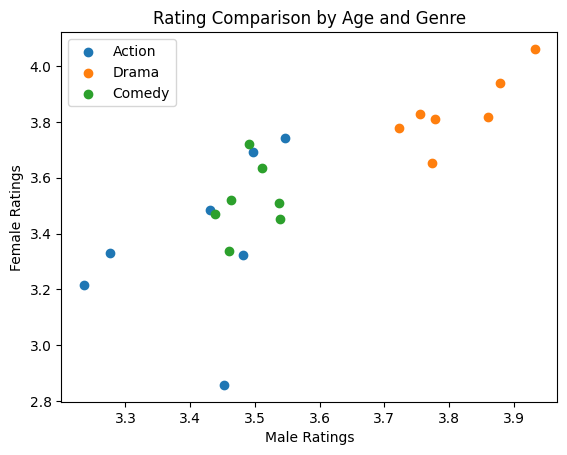

Correlation for Action genre: [[1.         0.41714355]
 [0.41714355 1.        ]]
Correlation for Drama genre: [[1.         0.79317999]
 [0.79317999 1.        ]]
Correlation for Comedy genre: [[1.         0.22915813]
 [0.22915813 1.        ]]


In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called data_3_3 with 'Age', 'Gender', 'Genres', and 'Rating' columns

# Filter data for Action, Drama, and Comedy genres
data_3_Action = data_3_3[data_3_3['Genres'] == 'Action']
data_3_Drama = data_3_3[data_3_3['Genres'] == 'Drama']
data_3_Comedy = data_3_3[data_3_3['Genres'] == 'Comedy']

# Create subsets for male and female in each genre
data_Male_Action = data_3_Action[data_3_Action['Gender'] == 'M']
data_Female_Action = data_3_Action[data_3_Action['Gender'] == 'F']

data_Male_Drama = data_3_Drama[data_3_Drama['Gender'] == 'M']
data_Female_Drama = data_3_Drama[data_3_Drama['Gender'] == 'F']

data_Male_Comedy = data_3_Comedy[data_3_Comedy['Gender'] == 'M']
data_Female_Comedy = data_3_Comedy[data_3_Comedy['Gender'] == 'F']

# Calculate the mean ratings for each 'Age' within the male and female groups for each genre
data_Male_Action_Mean = data_Male_Action.groupby('Age')['Rating'].mean()
data_Female_Action_Mean = data_Female_Action.groupby('Age')['Rating'].mean()

data_Male_Drama_Mean = data_Male_Drama.groupby('Age')['Rating'].mean()
data_Female_Drama_Mean = data_Female_Drama.groupby('Age')['Rating'].mean()

data_Male_Comedy_Mean = data_Male_Comedy.groupby('Age')['Rating'].mean()
data_Female_Comedy_Mean = data_Female_Comedy.groupby('Age')['Rating'].mean()

# Create scatter plots for each genre
plt.scatter(data_Male_Action_Mean, data_Female_Action_Mean, label='Action')
plt.scatter(data_Male_Drama_Mean, data_Female_Drama_Mean, label='Drama')
plt.scatter(data_Male_Comedy_Mean, data_Female_Comedy_Mean, label='Comedy')

plt.xlabel('Male Ratings')
plt.ylabel('Female Ratings')
plt.title('Rating Comparison by Age and Genre')
plt.legend()
plt.show()

# Calculate the correlations for each genre
correlation_Action = np.corrcoef(data_Male_Action_Mean, data_Female_Action_Mean)
correlation_Drama = np.corrcoef(data_Male_Drama_Mean, data_Female_Drama_Mean)
correlation_Comedy = np.corrcoef(data_Male_Comedy_Mean, data_Female_Comedy_Mean)

print("Correlation for Action genre:", correlation_Action)
print("Correlation for Drama genre:", correlation_Drama)
print("Correlation for Comedy genre:", correlation_Comedy)


In [35]:
merged_df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


<ipython-input-33-2b4ab80743b8>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Male_scientist = data_3_scientist_TR[data_M_and_F['Gender']=='M']
<ipython-input-33-2b4ab80743b8>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_Femal_scientist = data_3_scientist_TR[data_M_and_F['Gender']=='F']
<ipython-input-33-2b4ab80743b8>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Male_scientist_Mean = data_Male_scientist.groupby('Title').mean()
<ipython-input-33-2b4ab80743b8>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_Fema

[[1.         0.47962135]
 [0.47962135 1.        ]]
[[1.         0.45008376]
 [0.45008376 1.        ]]
[[1.         0.51847883]
 [0.51847883 1.        ]]


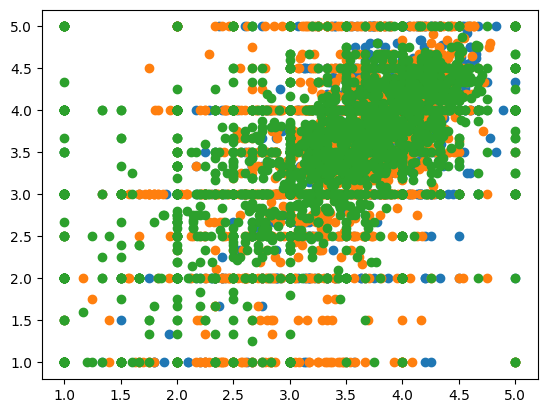

In [33]:
#-------------------------------
data_3_3 = merged_df[['Title','Gender','Genner','Rating']]
data_3_scientist = data_3_3[data_3_3['Occupation']==15]
data_3_programmer = data_3_3[data_3_3['Occupation']==12]
data_3_doctor = data_3_3[data_3_3['Occupation']==6]
#-------------------------------
#scientist
data_3_scientist_TR = data_3_scientist[['Title','Gender','Rating']]
data_Male_scientist = data_3_scientist_TR[data_M_and_F['Gender']=='M']
data_Femal_scientist = data_3_scientist_TR[data_M_and_F['Gender']=='F']
data_Male_scientist_Mean = data_Male_scientist.groupby('Title').mean()
data_Female_scientist_Mean = data_Femal_scientist.groupby('Title').mean()
data_plot_scientist = data_Male_scientist_Mean.merge(data_Female_scientist_Mean,how='left',on='Title')
data_plot_scientist_nonna = data_plot_scientist.dropna()
plt.scatter(data_plot_scientist_nonna['Rating_x'], data_plot_scientist_nonna['Rating_y'])
#programmer
data_3_programmer_TR = data_3_programmer[['Title','Gender','Rating']]
data_Male_programmer = data_3_programmer_TR[data_M_and_F['Gender']=='M']
data_Femal_programmer = data_3_programmer_TR[data_M_and_F['Gender']=='F']
data_Male_programmer_Mean = data_Male_programmer.groupby('Title').mean()
data_Female_programmer_Mean = data_Femal_programmer.groupby('Title').mean()
data_plot_programmer = data_Male_programmer_Mean.merge(data_Female_programmer_Mean,how='left',on='Title')
data_plot_programmer_nonna = data_plot_programmer.dropna()
plt.scatter(data_plot_programmer_nonna['Rating_x'], data_plot_programmer_nonna['Rating_y'])
#doctor
data_3_doctor_TR = data_3_doctor[['Title','Gender','Rating']]
data_Male_doctor = data_3_doctor_TR[data_M_and_F['Gender']=='M']
data_Femal_doctor = data_3_doctor_TR[data_M_and_F['Gender']=='F']
data_Male_doctor_Mean = data_Male_doctor.groupby('Title').mean()
data_Female_doctor_Mean = data_Femal_doctor.groupby('Title').mean()
data_plot_doctor = data_Male_doctor_Mean.merge(data_Female_doctor_Mean,how='left',on='Title')
data_plot_doctor_nonna = data_plot_doctor.dropna()
plt.scatter(data_plot_doctor_nonna['Rating_x'], data_plot_doctor_nonna['Rating_y'])
#-------------------------------------------------------------------------------------------------------------------------
#scientist
print(np.corrcoef(data_plot_scientist_nonna['Rating_x'],data_plot_scientist_nonna['Rating_y']))
#programmer
print(np.corrcoef(data_plot_programmer_nonna['Rating_x'],data_plot_programmer_nonna['Rating_y']))
#doctor
print(np.corrcoef(data_plot_doctor_nonna['Rating_x'],data_plot_doctor_nonna['Rating_y']))


[[1.         0.47962135]
 [0.47962135 1.        ]]
[[1.         0.45008376]
 [0.45008376 1.        ]]
[[1.         0.51847883]
 [0.51847883 1.        ]]


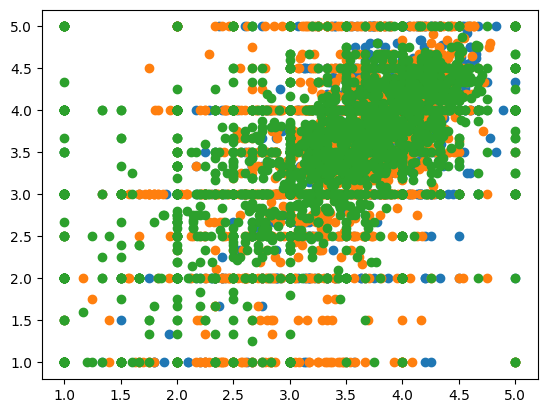

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ดึงข้อมูลเฉพาะ 'Title', 'Gender', 'Occupation', และ 'Rating'
data_3_3 = merged_df[['Title', 'Gender', 'Occupation', 'Rating']]

# คัดกรองข้อมูลสำหรับนักวิทยาศาสตร์ (scientist)
data_3_scientist = data_3_3[data_3_3['Occupation'] == 15]

# คัดกรองข้อมูลสำหรับโปรแกรมเมอร์ (programmer)
data_3_programmer = data_3_3[data_3_3['Occupation'] == 12]

# คัดกรองข้อมูลสำหรับแพทย์ (doctor)
data_3_doctor = data_3_3[data_3_3['Occupation'] == 6]

# --------------------------
# สหสัมพันธ์สำหรับนักวิทยาศาสตร์ (scientist)
data_3_scientist_TR = data_3_scientist[['Title', 'Gender', 'Rating']]
data_Male_scientist = data_3_scientist_TR[data_3_scientist_TR['Gender'] == 'M']
data_Femal_scientist = data_3_scientist_TR[data_3_scientist_TR['Gender'] == 'F']
data_Male_scientist_Mean = data_Male_scientist.groupby('Title')['Rating'].mean().reset_index()
data_Female_scientist_Mean = data_Femal_scientist.groupby('Title')['Rating'].mean().reset_index()
data_plot_scientist = data_Male_scientist_Mean.merge(data_Female_scientist_Mean, how='left', on='Title')
data_plot_scientist_nonna = data_plot_scientist.dropna()

# --------------------------
# สหสัมพันธ์สำหรับโปรแกรมเมอร์ (programmer)
data_3_programmer_TR = data_3_programmer[['Title', 'Gender', 'Rating']]
data_Male_programmer = data_3_programmer_TR[data_3_programmer_TR['Gender'] == 'M']
data_Femal_programmert = data_3_programmer_TR[data_3_programmer_TR['Gender'] == 'F']
data_Male_programmert_Mean = data_Male_programmer.groupby('Title')['Rating'].mean().reset_index()
data_Female_programmer_Mean = data_Femal_programmer.groupby('Title')['Rating'].mean().reset_index()
data_plot_programmer= data_Male_programmer_Mean.merge(data_Female_programmer_Mean, how='left', on='Title')
data_plot_programmer_nonna = data_plot_programmer.dropna()

# --------------------------
# สหสัมพันธ์สำหรับแพทย์ (doctor)
data_3_doctor_TR = data_3_doctor[['Title', 'Gender', 'Rating']]
data_Male_doctor = data_3_doctor_TR[data_3_doctor_TR['Gender'] == 'M']
data_Femal_doctor = data_3_doctor_TR[data_3_doctor_TR['Gender'] == 'F']
data_Male_doctor_Mean = data_Male_doctor.groupby('Title')['Rating'].mean().reset_index()
data_Female_doctor_Mean = data_Femal_doctor.groupby('Title')['Rating'].mean().reset_index()
data_plot_doctor = data_Male_doctor_Mean.merge(data_Female_doctor_Mean, how='left', on='Title')
data_plot_doctor_nonna = data_plot_doctor.dropna()

# สร้าง scatter plot และแสดงค่าสหสัมพันธ์
plt.scatter(data_plot_scientist_nonna['Rating_x'], data_plot_scientist_nonna['Rating_y'])
plt.scatter(data_plot_programmer_nonna['Rating_x'], data_plot_programmer_nonna['Rating_y'])
plt.scatter(data_plot_doctor_nonna['Rating_x'], data_plot_doctor_nonna['Rating_y'])

#scientist
print(np.corrcoef(data_plot_scientist_nonna['Rating_x'],data_plot_scientist_nonna['Rating_y']))
#programmer
print(np.corrcoef(data_plot_programmer_nonna['Rating_x'],data_plot_programmer_nonna['Rating_y']))
#doctor
print(np.corrcoef(data_plot_doctor_nonna['Rating_x'],data_plot_doctor_nonna['Rating_y']))


In [ ]:
data_3_programmer = data_3_3[data_3_3['Occupation'] == 12]


# Problem 4:
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  **Convince your boss that your conjecture is correct!**

คิดว่าเป็นบริษัทสร้างหนัง จะสร้างหนังอะไรจ้ะ สร้างสมมติฐานว่า target แบบไหน หาข้อมูลตั้งต่าง ว่าจะตอบคำถามอะไรใช้วิธีอะไร

### For example, which movie to make/buy? (seperating via Genre?)

# Done!

**What do you need to submit?**

* **Notebook File**: This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.


* **PPT Slides**: please prepare PPT slides (10 minutes)
    * Motivation about the data collection, why the topic is interesting to you. อธิบายเกี่ยวกับข้อมูล สร้างแรงบันดาลใจเดี่ยวกับข้อมูลให้ผู้รับฟัง ให้ผู้ฟังเข้าใจความเป็นมาและความสำคัญของข้อมูล
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What conjectures did you make and how did you support or disprove them using data?
    * Communicating Results with figures or tables
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report)
     
**How to submit:**

        ส่ง link ของ ipynb และ slides ในรูปแบบ pdf ใน Google Classroom
        
**Note: Each team just needs only one submission**